In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# pipeline imports
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# model lib
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# matrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# model export
import joblib

## Load Data

In [2]:
df = pd.read_csv("../data/application_train.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
gagal = df[df['TARGET'] == 1]

In [4]:
cross_tab = pd.crosstab(gagal['CODE_GENDER'], gagal['TARGET'])
cross_tab

TARGET,1
CODE_GENDER,
F,14170
M,10655


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [14]:
print(df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


## EDA

In [16]:
# select target and features
selected_features = [
    # 5C of Credit
    # CHARACTER (riwayat)
    'EXT_SOURCE_2', 'CODE_GENDER',
    # CAPACITY (kemampuan bayar)
    'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT',
    # CAPITAL (modal/kekayaan pribadi)
    'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    # COLLATERAL (aset yang dibiayai)
    'AMT_GOODS_PRICE',
    # CONDIITION (kondisi pekerjaan/linkungan)
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 
    'REGION_RATING_CLIENT',

    'TARGET', 
]

In [22]:
df_subset = df[selected_features]

df_subset = df_subset.dropna(subset=['TARGET'])

### Cek Class

C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_24588\4009334915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


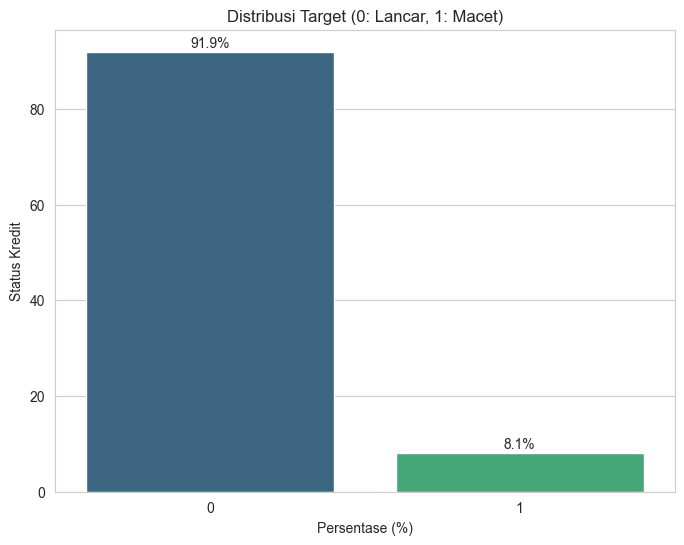

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))

counts = df_subset['TARGET'].value_counts(normalize=True) * 100
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')

plt.title('Distribusi Target (0: Lancar, 1: Macet)')
plt.xlabel('Persentase (%)')
plt.ylabel('Status Kredit')

for i, v in enumerate(counts.values):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.show()

Data yang ada memperlihatkan TARGET high class imbalance. Karena itu, modeling akan menggunakan parameter class_weight='balanced' dan mengevaluasi menggunakan metrik ROC-AUC, bukan sekadar Akurasi.

### Hubungan antara Gaji dan Kredit

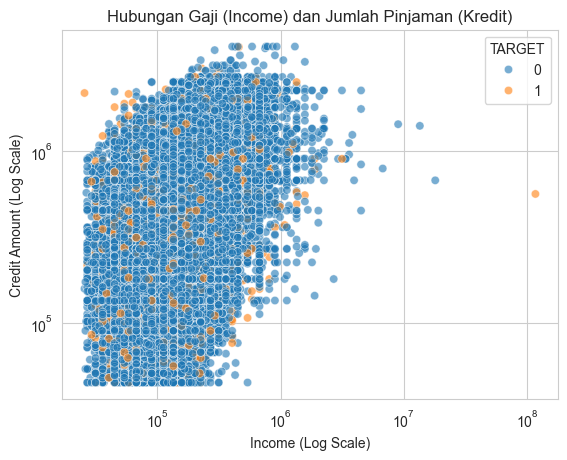

In [24]:
plt.Figure(figsize=(10, 8))

sns.scatterplot(
    data=df_subset,
    x='AMT_INCOME_TOTAL',
    y='AMT_CREDIT',
    hue='TARGET',
    alpha=0.6 # tranparasi
)

plt.title('Hubungan Gaji (Income) dan Jumlah Pinjaman (Kredit)')
plt.yscale('log') # logarithmic scale
plt.xscale('log')
plt.xlabel('Income (Log Scale)')
plt.ylabel('Credit Amount (Log Scale)')
plt.show()

### Analisis Kategorikal

C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_24588\2644709499.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


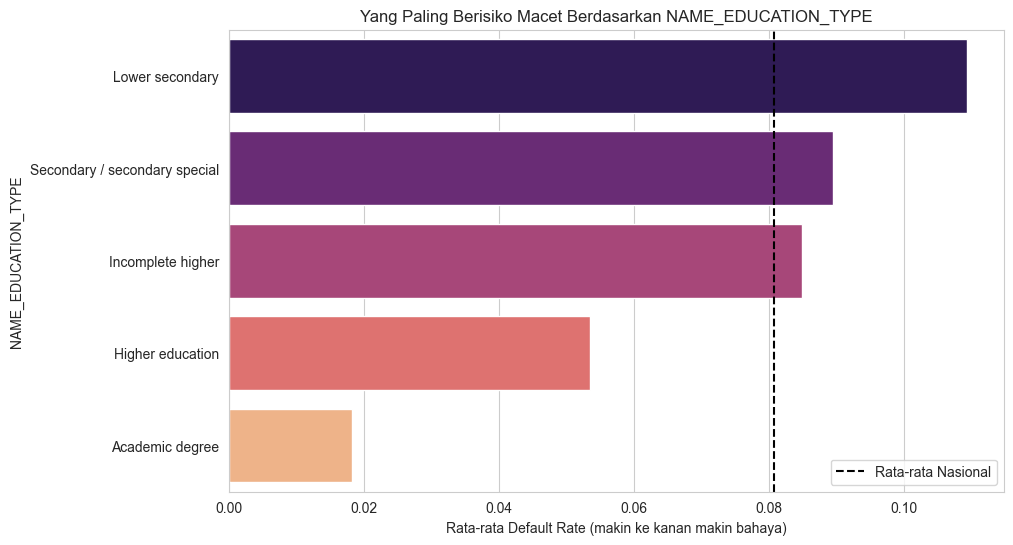

C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_24588\2644709499.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


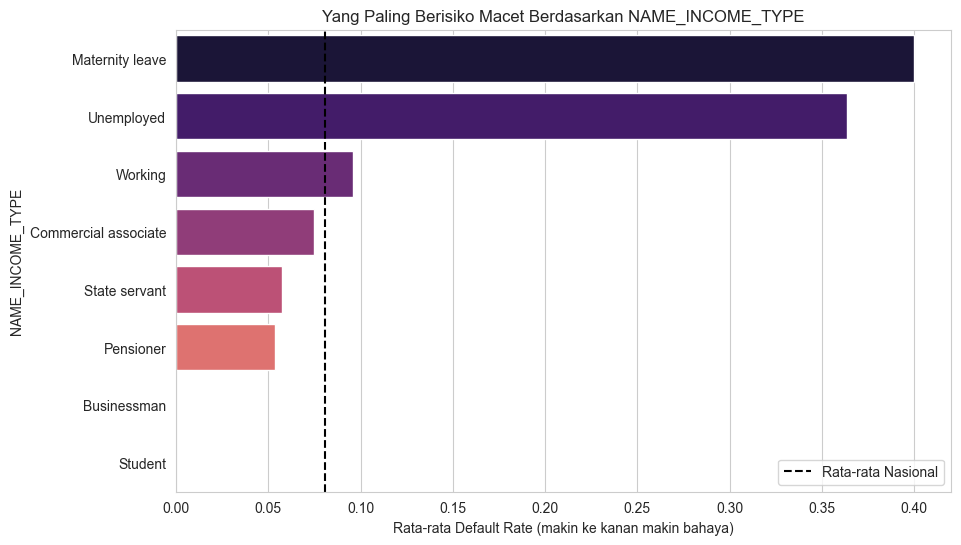

In [25]:
def plot_default_rate(feature_name):
    # hitung rata-rata terget per kategori (karena target 1/0, rata-rata = persentase macet)
    df_group = df_subset.groupby(feature_name)['TARGET'].mean().reset_index()
    df_group = df_group.sort_values(by='TARGET', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='TARGET',
        y=feature_name,
        data=df_group,
        palette='magma'
    )

    plt.title(f'Yang Paling Berisiko Macet Berdasarkan {feature_name}')
    plt.xlabel('Rata-rata Default Rate (makin ke kanan makin bahaya)')
    plt.axvline(df_subset['TARGET'].mean(), color='k', linestyle='--', label='Rata-rata Nasional')
    plt.legend()
    plt.show()

plot_default_rate('NAME_EDUCATION_TYPE')
plot_default_rate('NAME_INCOME_TYPE')

Terlihat bahwa tingkat pendidikan memiliki korelasi negatif dengan risiko gagal bayar. Semakin tinggi pendidikan, semakin rendah risiko macetnya

### Korelasi Fitur

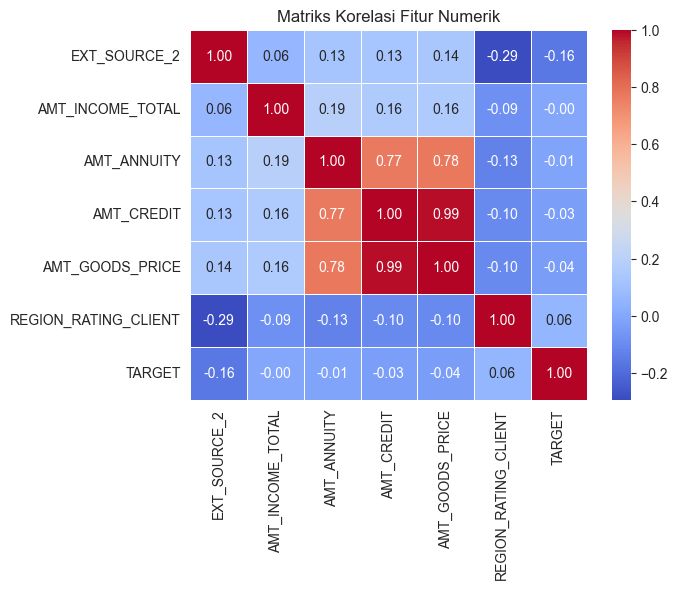

In [26]:
corr_matrix = df_subset.select_dtypes(include=['float64', 'int64']).corr()

plt.Figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

## Modelling

In [37]:
#Feature Engineering

# tambah kolom Debt to Income Ratio
df_subset['DIR'] = df_subset['AMT_ANNUITY'] / df_subset['AMT_INCOME_TOTAL']

# Credit to Income Ratio
df_subset['CREDIT_TO_INCOME'] = df_subset['AMT_CREDIT'] / df_subset['AMT_INCOME_TOTAL']

# Credit to Goods Ratio (LTV Proxy)
# Rasio Utang vs Harga Barang
# Kalau > 1, berarti dia pinjam lebih dari harga barang (over credit/cash out)
# Kalau < 1, berarti dia bayar DP -> lebih aman
df_subset['LTV'] = df_subset['AMT_CREDIT'] / df_subset['AMT_GOODS_PRICE']

In [44]:
df_subset.replace([np.inf, -np.inf], np.nan, inplace=True)
print('jumlah infinity values:', df_subset.isin([np.inf, -np.inf]).sum().sum())

jumlah infinity values: 0


In [45]:
x = df_subset.drop('TARGET', axis=1)
y = df_subset['TARGET']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape[0])

246008


In [46]:
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include='object').columns

# standarisasi, isi missing value dengan median, karena data keuangan umumnya distribusinya miring kanan, rata-ratanya lebih tinggi daripada median
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# isi teks kosong dengan "Missing" -> ubah jadi angka (OneHot)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

### RandomForest

In [47]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=1,
    class_weight='balanced'
)

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

### Gradient Boosting

In [51]:
model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=10
)

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

In [52]:
clf.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [53]:
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[:, 1]

print('Classification Report:')
print(classification_report(y_test, y_pred))

roc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_score:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.56      0.01      0.01      4965

    accuracy                           0.92     61503
   macro avg       0.74      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503

ROC AUC Score: 0.7103


In [ ]:
# save model
file_name = '../model/credeit_scoring_model.pkl'
joblib.dump(clf, file_name)

['credeit_scoring_model.pkl']